In [45]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
#Load Dataset
df = pd.read_csv('./cancer.csv')
df

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [47]:
#Create new Dataset without the ID column
df1 = df.drop('id', axis=1)
df1.head(5)

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [48]:
#Show Key Statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
UofCSize,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
UofCShape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
SECSize,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [49]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
DiabetesReport = pp.ProfileReport(df1)
DiabetesReport.to_file('DiabetesReportW5a.html')
display(IFrame('DiabetesReportW5a.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
#Covariance test - Levene Test

#   p <= alpha(0.05): reject H0, not the same covariance.
#   p > alpha(0.05): fail to reject H0, same covariance.

import scipy.stats as stats
names=df1.get('Class')

cnt=1
for col in df1.columns:
    if (col=='Class'):
        continue
        
    stat, p = stats.levene(df1[col][df1['Class'] == names[0]], 
                           df1[col][df1['Class'] == names[1]])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Covariance the Same (fail to reject H0)')
        print('\n')
    else:
        print('Covariance different(reject H0)')
        print('\n')
    cnt +=1    

Clump Thickness
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


UofCSize
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


UofCShape
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Marginal Adhesion
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


SECSize
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Bare Nuclei
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Bland Chromatin
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Normal Nucleoli
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Mitoses
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)




In [51]:
#Create x and y variables
x = df1.drop('Class', axis=1).to_numpy()
Y = df1['Class'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [52]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == 2).sum()
num_ones = (y_train_smt == 4).sum()
print('Class 2 -',  num_zeros)
print('Class 4 -',  num_ones)

Train Data - Class Split
Class 2 - 355
Class 4 - 355


In [53]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression(solver='liblinear',
                                               class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))         


Estimator: LDA
[[89  0]
 [ 3 45]]
              precision    recall  f1-score   support

           2       0.97      1.00      0.98        89
           4       1.00      0.94      0.97        48

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137


Estimator: QDA
[[85  4]
 [ 1 47]]
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        89
           4       0.92      0.98      0.95        48

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137


Estimator: LogReg
[[89  0]
 [ 3 45]]
              precision    recall  f1-score   support

           2       0.97      1.00      0.98        89
           4       1.00      0.94      0.97        48

    accuracy                           0.98       137
   macro avg       0

In [54]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='liblinear',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1', 'l2']}
modelpara.insert(2,param_gridlogreg)

In [55]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()

LDA Learning Curve


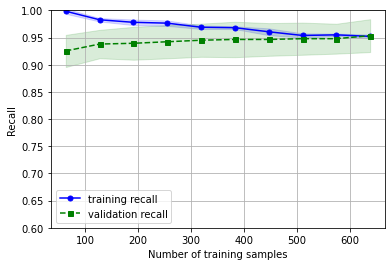


 QDA Learning Curve


/Users/ismailsever/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


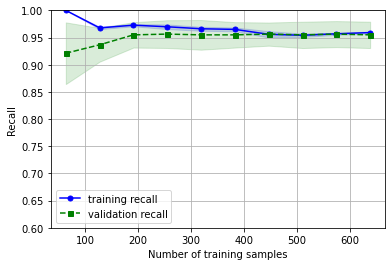


 Logistic Regression Learning Curve


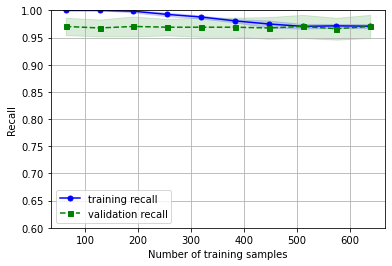

In [56]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
LDA 0.96 +/- 0.02
QDA 0.95 +/- 0.03
Log Reg 0.97 +/- 0.02




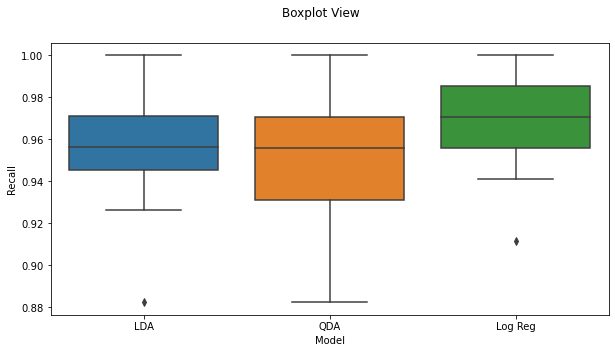

In [57]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,Y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [58]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Class 2','Class 4']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[89  0]
 [ 3 45]]

               precision    recall  f1-score   support

     Class 2       0.97      1.00      0.98        89
     Class 4       1.00      0.94      0.97        48

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137

ROC Curve


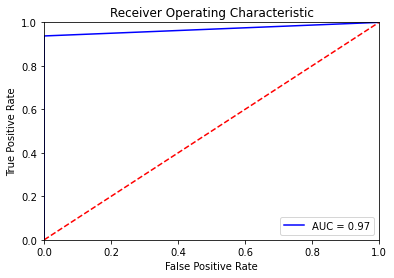


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[85  4]
 [ 1 47]]

               precision    recall  f1-score   support

     Class 2       0.99      0.96      0.97        89
     Class 4       0.92      0.98      0.95        48

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137

ROC Curve


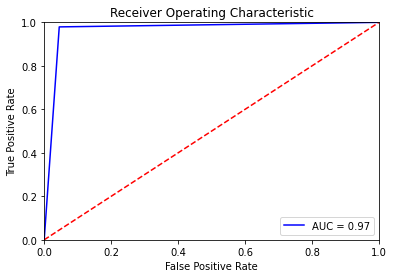


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100,
                   solver='liblinear')

Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2'}

 [[89  0]
 [ 2 46]]

               precision    recall  f1-score   support

     Class 2       0.98      1.00      0.99        89
     Class 4       1.00      0.96      0.98        48

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

ROC Curve


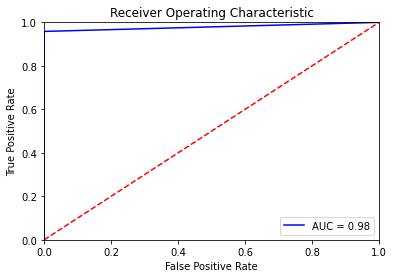

In [59]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)